<a href="https://colab.research.google.com/github/RafaelHGS/Lista-De-Exercicios-Recursividade/blob/main/APS_T%C3%A9cnicas_de_Programa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configurações de Ambiente e limite máximo de recursividade**

Para executar basta, em ordem, clicar no play de cada célula OU selecionar a célula e pressionar as teclas "Shift" + "Enter"

In [ ]:
from random import seed
from random import randint
import time
import sys
import numpy as np

sys.setrecursionlimit(10 ** 9)

**Solução Iterativa - QuickSort**

In [ ]:
def partition(colecao, l, h):
    i = ( l - 1 )
    x = colecao[h]
 
    for j in range(l, h):
        if   colecao[j] <= x:

            i = i + 1
            colecao[i], colecao[j] = colecao[j], colecao[i]
 
    colecao[i + 1], colecao[h] = colecao[h], colecao[i + 1]
    return (i + 1)
 
def quickSortIterative(colecao, l, h):
 
    size = h - l + 1
    stack = [0] * (size)
 
    top = -1
 
    top = top + 1
    stack[top] = l
    top = top + 1
    stack[top] = h
 
    while top >= 0:
 
        h = stack[top]
        top = top - 1
        l = stack[top]
        top = top - 1
 
        p = partition( colecao, l, h )
 
        if p-1 > l:
            top = top + 1
            stack[top] = l
            top = top + 1
            stack[top] = p - 1
 
        if p + 1 < h:
            top = top + 1
            stack[top] = p + 1
            top = top + 1
            stack[top] = h

**Solução Recursiva - QuickSort**

In [ ]:
def partition(colecao, low, high):
    i = (low - 1)        
    pivot = colecao[high]    
 
    for j in range(low, high):
        if colecao[j] <= pivot:
            i += 1
            colecao[i], colecao[j] = colecao[j], colecao[i]
 
    colecao[i + 1], colecao[high] = colecao[high], colecao[i + 1]
    return (i + 1)
 
def quickSortRecursive(colecao, low, high):
    if low < high:
 
        pi = partition(colecao, low, high)
 
        quickSortRecursive(colecao, low, pi-1)
        quickSortRecursive(colecao, pi + 1, high)

## Fim Solução Recursiva




**Criando Coleção**

Utilizando valores aleatórios

In [ ]:
def criarColecao(colecao, tamanho):
     for indice in range(0, tamanho):
        valor = np.int64(randint(0, 51))
        colecao.append(valor)

**O que fazer na APS?**


0.   Estudar algoritmo QuickSort
1.   Definir um conjunto de "tamanhos" de experimento para os testes
2.   Rodar os Testes e anotar os tempos
3.   Preparar uma conclusão a respeito do tempo de solução e o custo benefícios para implementação
4.   Apresentar os tempos no formato de tabela

**Desafio**: Utilizar Pandas e MatplotLib para apresentar os resultados. 0,5 na N2

*Função Principal*


In [ ]:
def main():
  TAMANHO = 500000 
  colecao = []

  criarColecao(colecao,  TAMANHO)
  
  colecaoRecursiva = colecao.copy()
  colecaoIterativa = colecao.copy()

  tempoInicial = time.time() 
  quickSortRecursive(colecaoRecursiva, 0, TAMANHO - 1)
  tempoFinal = time.time()

  print("Tempo Solução Recursiva: {} s".format(tempoFinal - tempoInicial))

  tempoInicial = time.time() 
  quickSortIterative(colecaoIterativa, 0, TAMANHO - 1) 
  tempoFinal = time.time()
  print("Tempo Solução Iterativa: {} s".format(tempoFinal - tempoInicial))

In [ ]:
if __name__ == '__main__' :
    main()

Tempo Solução Recursiva: 781.2891793251038 s
Tempo Solução Iterativa: 656.6084649562836 s


**Exemplo para criar gráfico e uma planilha com Pandas**

- Clique na pasta a esquerda e veja o arquivo PNG e a planilha que foram geradas!

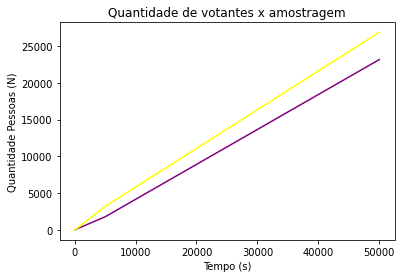

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

listaQtdParticipantes = [50, 500, 5000, 50000]
listaVotoRoxo = [23, 210, 1800, 23145]
listaVotoAmarelo = [27, 290, 3200, 26855]

dicionario = {"QTD": listaQtdParticipantes, "VOTOS_ROXO": listaVotoRoxo, "VOTOS_AMARELO": listaVotoAmarelo}

planilha = pd.DataFrame.from_dict(dicionario)
planilha.to_excel("Dados.xlsx")

plt.plot(planilha["QTD"], planilha["VOTOS_ROXO"], color = "purple")
plt.plot(planilha["QTD"], planilha["VOTOS_AMARELO"], color = "yellow")

plt.title("Quantidade de votantes x amostragem")
plt.xlabel("Tempo (s)")
plt.ylabel("Quantidade Pessoas (N)")

plt.savefig("Grafico.png")
plt.show()
